# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

In [2]:
import matplotlib.pyplot as  plt
%matplotlib inline

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **

In [4]:
# Noise is added here

# Generate random noise with the same shape as the image
import numpy as np
mean = .5
stddev = .16
noise = np.random.normal(mean, stddev, x_train[1].shape)

# Add the noise to the image
image_noise_added = x_train[1] + noise
image_noise_added


# The max value of the noise should not grossly surpass 1.0
max(noise)

1.000400027849817

In [5]:
# Max of noise is less than .1002; very slightly over 1  

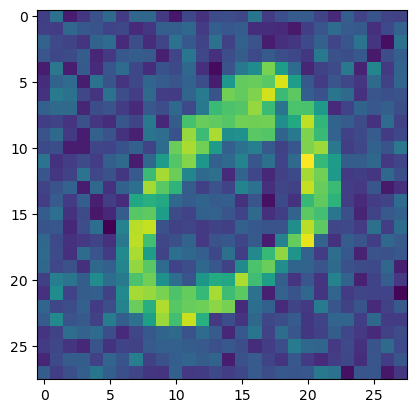

In [6]:
# New Image vs Old
# New Image with noise added
plt.imshow(image_noise_added.reshape(28, 28))

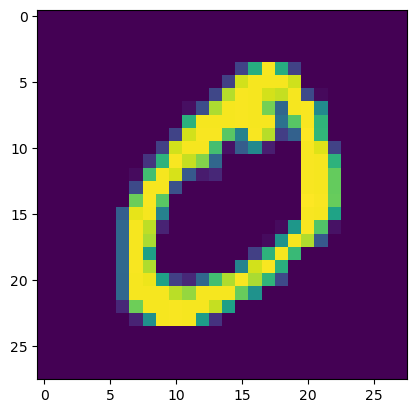

In [7]:
# Old Image without noise added
plt.imshow(x_train[1].reshape(28, 28))

In [8]:
# Normalization
mean = np.mean(x_train)
std = np.std(x_train)
x_train_norm = (x_train - mean) / std

mean = np.mean(x_test)
std = np.std(x_test)
x_test_norm = (x_test - mean) / std

In [9]:
### Add noise to whole set of images 
# Noise is added here

# Generate random noise with the same shape as the image
import numpy as np
mean = .0
stddev = 2.0
# noise = np.random.normal(mean, stddev, x_train.shape)

# Generate random noise with the same shape as the image
# test_noise = np.random.normal(mean, stddev, x_test.shape)
x_train_noise = np.random.normal(mean, stddev, x_train.shape)
x_test_noise = np.random.normal(mean, stddev, x_test.shape)

# Add noise
x_train_noise_added = x_train_norm + x_train_noise
x_test_noise_added = x_test_norm + x_test_noise
# y_train_noise = y_train + y_train_noise
# y_test_noise = y_test + y_test_noise

# Add noise
x_test_noise[1]

array([ 1.98526283e+00,  3.72791427e+00,  1.74883941e-01,  7.87424236e-01,
       -3.42958331e+00,  2.11577901e+00, -2.03260579e+00, -3.25397698e-01,
       -8.70449259e-01, -2.30001116e+00, -2.75004799e+00, -5.81128565e-01,
       -9.93027120e-01,  1.93561432e+00,  3.99198015e+00, -1.02125915e+00,
        9.74723778e-01,  1.14586365e+00,  4.67077591e-01,  2.28481688e+00,
       -2.33466069e+00, -2.17919131e+00, -3.75952181e+00, -1.01123996e+00,
       -1.37726083e+00,  2.79304529e+00, -1.20813826e+00, -5.05302952e+00,
        1.32992202e-01, -1.22959905e+00,  2.91419916e+00, -4.37376880e+00,
        1.98512085e+00,  6.29047567e-01, -2.96553610e+00,  1.75077724e+00,
       -3.95428718e+00, -6.01371711e-01, -2.91109500e+00,  4.70922606e-01,
       -3.94998918e+00, -1.20390627e+00, -5.44763946e-01, -4.28761970e-01,
        4.05453587e+00,  2.65797699e+00, -4.24462282e-01,  6.67972819e-01,
        1.90181279e+00, -4.07674993e-01, -1.23273354e+00,  1.47100583e+00,
        2.52791927e+00, -

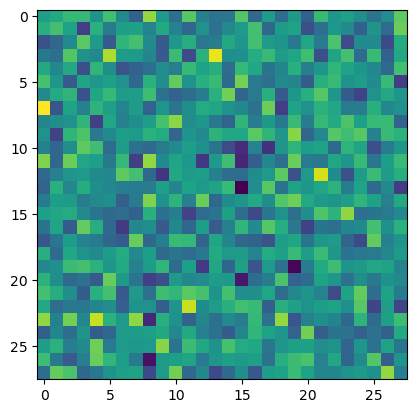

In [10]:
# Compare Noises to Ensure they are Different
# Noise on Image 122
plt.imshow(x_train_noise[122].reshape(28, 28))

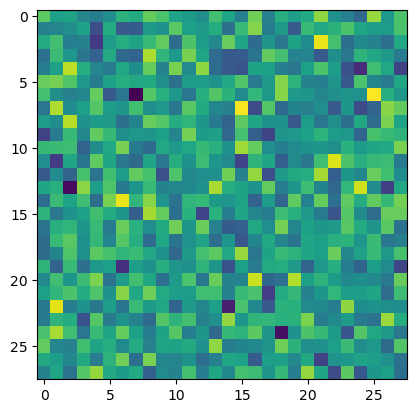

In [11]:
# Noise on Image 124
plt.imshow(x_train_noise[124].reshape(28, 28))

As the two visual representations (images) of the noise show different patterns, they are indicating different noise levels for each image 

2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 

In [12]:
%%capture
## Code From Base for Creating Neural Network Without Noise
def neural_network(batch_size, num_classes, epochs, x_train, x_test, y_train, y_test):

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer="adam",
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return score

In [13]:
import pandas as pd
(
np.max(x_train_noise),
np.min(x_train_noise),
np.max(x_train),
np.min(x_train)
)

(10.62403342399543, -11.502094450839351, 1.0, 0.0)

In [14]:
batch_size = 128
num_classes = 10
epochs = 20

# NN With Noise
neural_network(batch_size, num_classes, epochs, x_train_noise_added, x_test_noise_added, y_train, y_test)
# NN Without Noise
neural_network(batch_size, num_classes, epochs, x_train, x_test, y_train, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [

[0.0729510709643364, 0.9851999878883362]

Looking at the above two models generated by neural nets, we see that the model with noise reached a final accuracy of .889, while the one without noise reached a final accuracy of .985. All other elements of the model, besides noise, are held constant (the function defines the same number of layers, and batch size/number of classes/epochs are also constant.) Therefore, we see a noticeable dropoff in accuracy as a result of adding noise to the dataset. 

3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

In [15]:
def neural_network_with_noise(mean, stddev, batch_size, num_classes, epochs, x_train, x_test, y_train, y_test):
    # noise = np.random.normal(mean, stddev, x_train.shape)

    # Generate random noise with the same shape as the image
    # test_noise = np.random.normal(mean, stddev, x_test.shape)
    x_train_noise = np.random.normal(mean, stddev, x_train.shape)
    x_test_noise = np.random.normal(mean, stddev, x_test.shape)

    # Add noise
    x_train_noise_added = x_train_norm + x_train_noise
    x_test_noise_added = x_test_norm + x_test_noise
    score = neural_network(batch_size, num_classes, epochs, x_train_noise_added, x_test_noise_added, y_train, y_test)
    
    # Append Loss & Accuracy To List 
    test_loss = score[0]
    test_accuracy = score[1]
    loss_values.append(test_loss)
    accuracy_values.append(test_accuracy)

In [16]:
# %%capture
## Combining Noise Code with Model-Running code for a single, repeatable block:
# Listing Scale (i.e. Standard Deviation) Values over which to train models
stddev_values = [0.1, 0.5, 1.0, 2.0, 4.0]  # Values given 
# Initializing Lists
loss_values = []
accuracy_values = []
batch_size = 128
num_classes = 10
epochs = 20
mean = 0

# Loop:
for stddev in stddev_values:
    neural_network_with_noise(mean, stddev, batch_size, num_classes, epochs, x_train, x_test, y_train, y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469

 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3891 - accuracy: 0.8780 - val_loss: 0.1948 - val_accuracy: 0.9382
Epoch 2/20
469/469 [=========

                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.5456 - accuracy: 0.4954 - val_loss: 1.0872 - val_accuracy: 0.6321
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.9989 - accuracy: 0

In [17]:
accuracy_values

[0.9822999835014343,
 0.9753999710083008,
 0.9562000036239624,
 0.8881000280380249,
 0.652400016784668]

In [18]:
# Compile Loss and Accuracy statistics for the models into a single data frame 
accuracy_loss_results_dataframe = pd.DataFrame({'stddev_values': stddev_values, 'loss_values': loss_values, 'accuracy_values': accuracy_values})
accuracy_loss_results_dataframe

,stddev_values,loss_values,accuracy_values
0,0.1,0.091018,0.9823
1,0.5,0.156008,0.9754
2,1.0,0.293906,0.9562
3,2.0,0.679425,0.8881
4,4.0,1.836019,0.6524


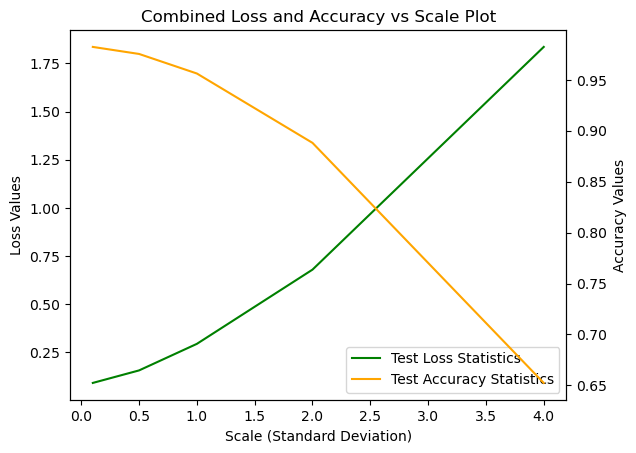

In [19]:
# Plotting Results
fig, ax1 = plt.subplots()
loss_line = ax1.plot(stddev_values, loss_values, color = 'green', label = 'Test Loss Statistics')

# Loss line Plot
ax1.set_xlabel('Scale (Standard Deviation)')
ax1.set_ylabel('Loss Values')
ax1.set_title('Combined Loss and Accuracy vs Scale Plot')

# Accuracy line Plot
ax2 = ax1.twinx()
accuracy_line = ax2.plot(stddev_values, accuracy_values, color='orange', label='Test Accuracy Statistics')
ax2.set_ylabel('Accuracy Values')

# Combine Both Lines Into One Plot
lines = loss_line + accuracy_line
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

The plot shows an inverse relationship between the scale of the noise and the accuracy of the model; in other words, noise makes the models less predictive. 